# Exploratory Data Analysis (EDA): Living Situation & Family Financial Status
***

<p style="text-align: center;">
<img src="../../../images/living.jpg" alt="Demographics and Background" style="width: 800px; height: 500px;">
</p>


## Introduction
This notebook aims to explore the influence of students' living situations and family financial status on their academic performance. We will analyze how these factors impact access to resources, learning environments, and ultimately, students' exam scores.

---

## 1. Living Situation

### Questions to Explore:
- **How does living situation (e.g., with parents, guardians, or alone) influence academic performance?**
  - Hypothesis: Students living with both parents may perform better due to greater emotional and financial support.

---

## 2. Family Financial Status

### Questions to Explore:
- **How does family financial status impact students' access to resources (like tutoring and learning materials)?**
  - Hypothesis: Students from higher financial status families have greater access to supplementary educational resources.
  
---

## Conclusion
Summarize findings and provide insights into how living situation and family financial status influence academic performance. Offer recommendations based on the results of the analysis.

---

## Next Steps
- Import necessary libraries and load the dataset.
- Begin the analysis as outlined in the steps above.


In [3]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [5]:
query = "SELECT * FROM student_performance LIMIT 5;"
df = pd.read_sql(query, con=engine)
df.head()

,Student ID,Gender,Age Group,Living Situation,Parent Education Level,Family Financial Status,Class,Department,Performance in English,Performance in Maths,...,School Learning Resources,Motivation for Attending School,Plan to Attend University,JAMB Goal Score,Extracurricular Hours,Free Time Activities,Language at Home,Involved in Work Outside School,Last Exam Performance,Foundational Knowledge
0,1001,Female,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,SS2,Science,Excellent,Good,...,Library,To learn and gain knowledge,Yes,200 To 250,Less than 5 hours,Doing chores at home,Yoruba,Frequently,60% - 69%,Average
1,1002,Female,15 - 16,Both parents,Higher Education,We can afford some luxuries,SS3,Science,Good,Good,...,Library,To prepare for a good career,Yes,300 And Above,5 - 10 hours,Others,Yoruba,Occasionally,70% - 100%,Strong
2,1003,Male,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,SS3,Science,Fair,Fair,...,Nil,To prepare for a good career,Not Sure,200 To 250,More than 10 hours,Playing sports,English,No,60% - 69%,Average
3,1004,Male,12 - 14,Both parents,Higher Education,We can afford some luxuries,SS3,Science,Good,Excellent,...,"Computer lab, Extra tutoring sessions",To learn and gain knowledge,Yes,300 And Above,Less than 5 hours,"Studying,Socializing with friends,Watching mov...",English,No,70% - 100%,Average
4,1005,Male,15 - 16,Single parent,Higher Education,We are financially comfortable,SS3,Science,Good,Fair,...,"Computer lab, Extra tutoring sessions",To prepare for a good career,Yes,200 To 250,Less than 5 hours,"Watching movies,Playing sports,Doing chores at...",English,No,60% - 69%,Strong


In [6]:
df.shape

(5, 47)

## How does living situation (e.g., with parents, guardians, or alone) influence academic performance?

In [8]:
query = """
SELECT "Living Situation", "Last Exam Performance", COUNT(*) as Count
FROM student_performance
GROUP BY "Living Situation", "Last Exam Performance";
"""
performance_df = pd.read_sql(query, engine)
performance_df

,Living Situation,Last Exam Performance,Count
0,Both parents,40% - 59%,9
1,Both parents,60% - 69%,27
2,Both parents,70% - 100%,40
3,Both parents,Below 40%,4
4,Guardian,60% - 69%,4
5,Guardian,70% - 100%,1
6,Single parent,40% - 59%,3
7,Single parent,60% - 69%,8
8,Single parent,70% - 100%,3
9,Single parent,Below 40%,1


Last Exam Performance  40% - 59%  60% - 69%  70% - 100%  Below 40%
Living Situation                                                  
Both parents                 9.0       27.0        40.0        4.0
Guardian                     0.0        4.0         1.0        0.0
Single parent                3.0        8.0         3.0        1.0


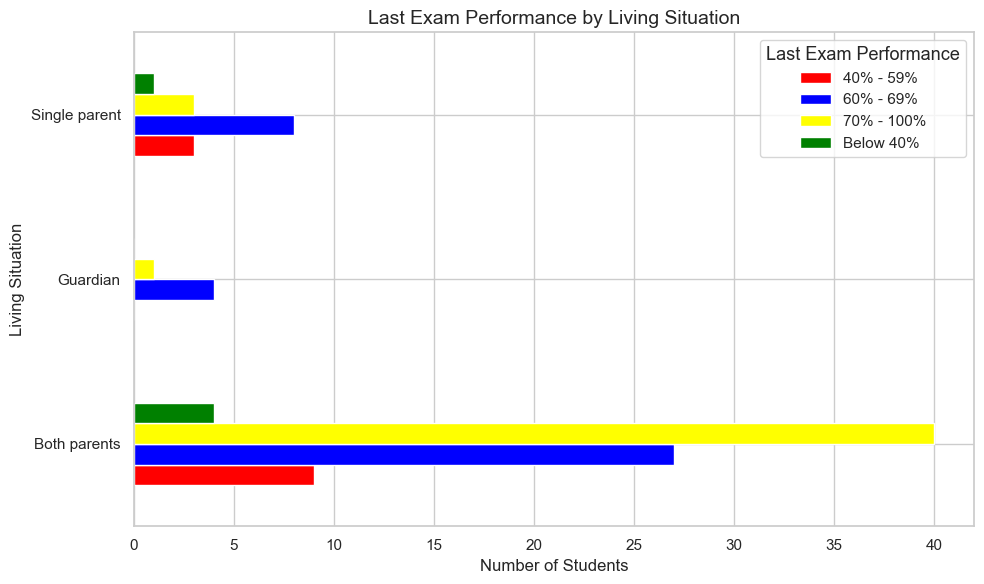

In [92]:
pivot_df = performance_df.pivot(index='Living Situation', columns='Last Exam Performance', values='Count').fillna(0)

print(pivot_df)

# Plotting
ax = pivot_df.plot(kind='barh', figsize=(10, 6), color=['red', 'blue', 'yellow', 'green'])

plt.title('Last Exam Performance by Living Situation', fontsize=14)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Living Situation', fontsize=12)
plt.legend(title='Last Exam Performance', title_fontsize='13', fontsize='11')

plt.tight_layout()

image_path = '../../../docs/exmbyliving.png'  
plt.savefig(image_path)

plt.show()

# Insights on Last Exam Performance by Living Situation

## Overview
This analysis explores the relationship between students' last exam performance and their living situations. The data highlights the performance distribution among students living with both parents, guardians, and single parents.

## Last Exam Performance Data
| Living Situation | 40% - 59% | 60% - 69% | 70% - 100% | Below 40% |
|------------------|-----------|-----------|------------|-----------|
| **Both Parents**  | 9         | 27        | 40         | 4         |
| **Guardian**      | 0         | 4         | 1          | 0         |
| **Single Parent**  | 3         | 8         | 3          | 1         |

## Insights

### 1. Performance Distribution
- **Both Parents**:
  - The group shows the highest academic performance, with **40 students** scoring between **70% - 100%**.
  - **27 students** scored in the **60% - 69%** range, and only **4** scored below **40%**.
  - This suggests a strong support system, likely contributing to their success.

- **Guardian**:
  - This group has significantly lower performance overall, with only **4 students** scoring in the **60% - 69%** range and just **1** achieving **70% - 100%**.
  - Notably, no students in this group scored below **40%**, indicating that guardians may offer some support, although it is limited compared to parental support.

- **Single Parent**:
  - This group displays a mix of performance levels, with **3 students** scoring in the **70% - 100%** range, **8** in the **60% - 69%** range, and **1** scoring below **40%**.
  - The performance suggests that while some single-parent households provide adequate support, challenges may affect overall academic performance.

### 2. General Observations
- **High Achievers**: Students living with both parents are more likely to achieve high scores, with significant numbers in the top performance bracket (70% - 100%).
- **Low Performers**: The guardian group has the least number of high achievers, suggesting they struggle to provide the same level of academic support as parents.
- **Risk Factors**: Single-parent households show varied performance, indicating that while some students succeed, others may face obstacles that hinder their academic performance.

### 3. Potential Recommendations
- **Support Programs**: Educational institutions and policymakers could implement targeted support programs for single-parent families and guardians to improve students' academic performance.
- **Engagement Strategies**: Schools might explore ways to engage parents and guardians effectively, ensuring they have the tools to support their children academically.
- **Resource Allocation**: Identifying factors leading to lower performance in guardian and single-parent households can guide targeted interventions to enhance educational outcomes.

## Conclusion
The analysis of the relationship between living situation and academic performance highlights the importance of family structure in influencing students' educational success. While students living with both parents tend to perform better academically, guardians and single parents can also foster success with the right support and resources. Understanding these dynamics can guide interventions that promote academic achievement across all family structures.

---

# Problem Statement: Impact of Involvement in Work Outside School on Academic Performance

## Background
From our previous analysis, we observed that students living with **guardians** and **single parents** do not perform as well academically as students living with **both parents**. One possible explanation is that students in guardian and single-parent households may be more involved in activities outside of school, which could impact their academic performance.

To investigate this, we will analyze the relationship between:
- **Involvement in Work Outside School**: 
  - ['Frequently', 'Occasionally', 'No']
- **Living Situation**:
  - ['Both parents', 'Guardian', 'Single parent']

## Objective
The goal of this analysis is to examine whether the frequency of involvement in work outside of school correlates with lower academic performance among students from different living situations.

## Key Research Questions
1. **How frequently are students from different living situations involved in work outside school?**
   - Do students living with **guardians** or **single parents** tend to work outside school more frequently than those living with **both parents**?
   
2. **Does involvement in work outside school negatively impact academic performance?**
   - Do students who work **frequently** or **occasionally** show lower performance compared to those who are **not involved** in work outside school?


In [27]:
query = """
SELECT "Living Situation", "Involvement in Work Outside School", COUNT(*) AS Count
FROM student_performance
GROUP BY "Living Situation", "Involvement in Work Outside School";
"""

work_involvement_df = pd.read_sql(query, engine)

work_involvement_df

,Living Situation,"""Involvement in Work Outside School""",Count
0,Both parents,Involvement in Work Outside School,80
1,Guardian,Involvement in Work Outside School,5
2,Single parent,Involvement in Work Outside School,15


In [29]:
# Renaming columns explicitly
work_involvement_df = work_involvement_df.rename(columns={
    'Living Situation': 'Living Situation',
    '"Involvement in Work Outside School"': 'Involvement in Work Outside School',
    'Count': 'Count'
})

In [31]:
work_involvement_df

,Living Situation,Involvement in Work Outside School,Count
0,Both parents,Involvement in Work Outside School,80
1,Guardian,Involvement in Work Outside School,5
2,Single parent,Involvement in Work Outside School,15


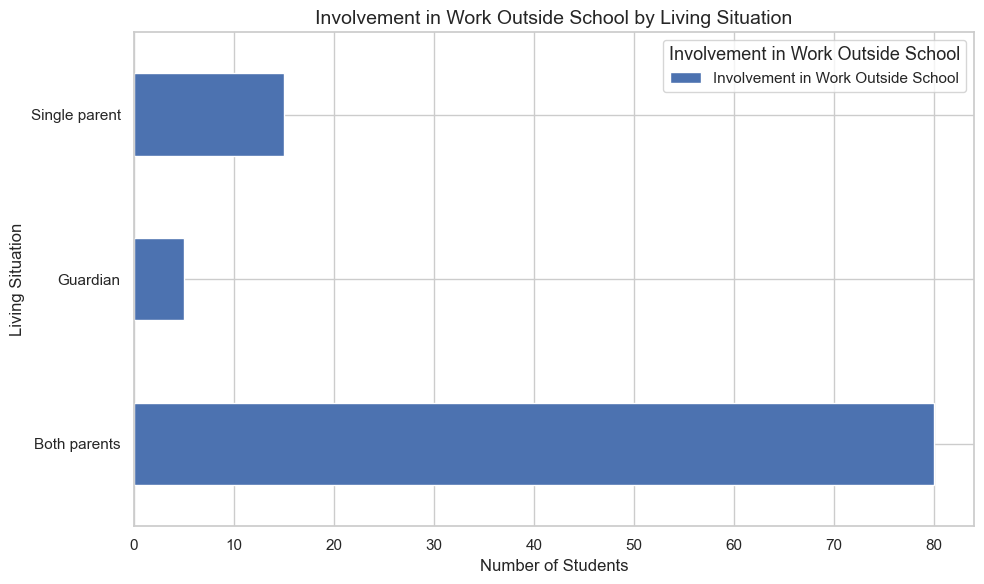

In [94]:
pivot_df = work_involvement_df.pivot_table(index='Living Situation', 
                                           columns='Involvement in Work Outside School', 
                                           values='Count', 
                                           aggfunc='sum', 
                                           fill_value=0)

ax = pivot_df.plot(kind='barh', figsize=(10, 6))

plt.title('Involvement in Work Outside School by Living Situation', fontsize=14)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Living Situation', fontsize=12)

plt.legend(title='Involvement in Work Outside School', title_fontsize='13', fontsize='11')

plt.tight_layout()

image_path = '../../../docs/exmliving.png'  # Change to your desired path
plt.savefig(image_path)

plt.show()

### Conclusion

The analysis of students' living situations and their involvement in work outside school challenges my initial hypothesis. I expected that students without both parents would have more responsibilities that distract them, but the findings tell a different story.

1. **Living with Both Parents**: Students in this group showed the highest involvement in work outside school. This suggests that parental support helps them effectively balance their academic and work commitments.

2. **Living with Guardians**: Students under guardianship exhibited minimal work involvement. This may indicate a lack of encouragement for them to take on work responsibilities.

3. **Single Parents**: Those living with a single parent displayed moderate involvement, suggesting they handle some responsibilities but still manage to engage in work outside school.

In summary, these insights emphasize the role of parental support in facilitating students' engagement with work outside school, reshaping my understanding of how living situations impact student responsibilities.


## 2. Family Financial Status¶
> ### How does family financial status impact students' access to resources (like tutoring and learning materials)?

In [39]:
query = """
SELECT "Home Learning Resources", "Family Financial Status" 
FROM student_performance;
"""

# Execute the query and read into a DataFrame
data_frame = pd.read_sql(query, con=engine)

# Display the DataFrame
data_frame

,Home Learning Resources,Family Financial Status
0,Internet,We meet our needs but can't afford luxuries
1,"Textbooks,Internet,Private study space",We can afford some luxuries
2,Internet,We meet our needs but can't afford luxuries
3,"Textbooks,Internet,Private study space",We can afford some luxuries
4,"Textbooks,Internet,Private study space,Laptop",We are financially comfortable
...,...,...
95,Textbooks,We can afford some luxuries
96,Internet,We meet our needs but can't afford luxuries
97,Nil,We meet our needs but can't afford luxuries
98,Textbooks,We can afford some luxuries


In [43]:
# Creating a new column that counts the number of resources
data_frame['Resource Count'] = data_frame['Home Learning Resources'].str.split(',').str.len()

# Display the updated DataFrame
data_frame

,Home Learning Resources,Family Financial Status,Resource Count
0,Internet,We meet our needs but can't afford luxuries,1
1,"Textbooks,Internet,Private study space",We can afford some luxuries,3
2,Internet,We meet our needs but can't afford luxuries,1
3,"Textbooks,Internet,Private study space",We can afford some luxuries,3
4,"Textbooks,Internet,Private study space,Laptop",We are financially comfortable,4
...,...,...,...
95,Textbooks,We can afford some luxuries,1
96,Internet,We meet our needs but can't afford luxuries,1
97,Nil,We meet our needs but can't afford luxuries,1
98,Textbooks,We can afford some luxuries,1


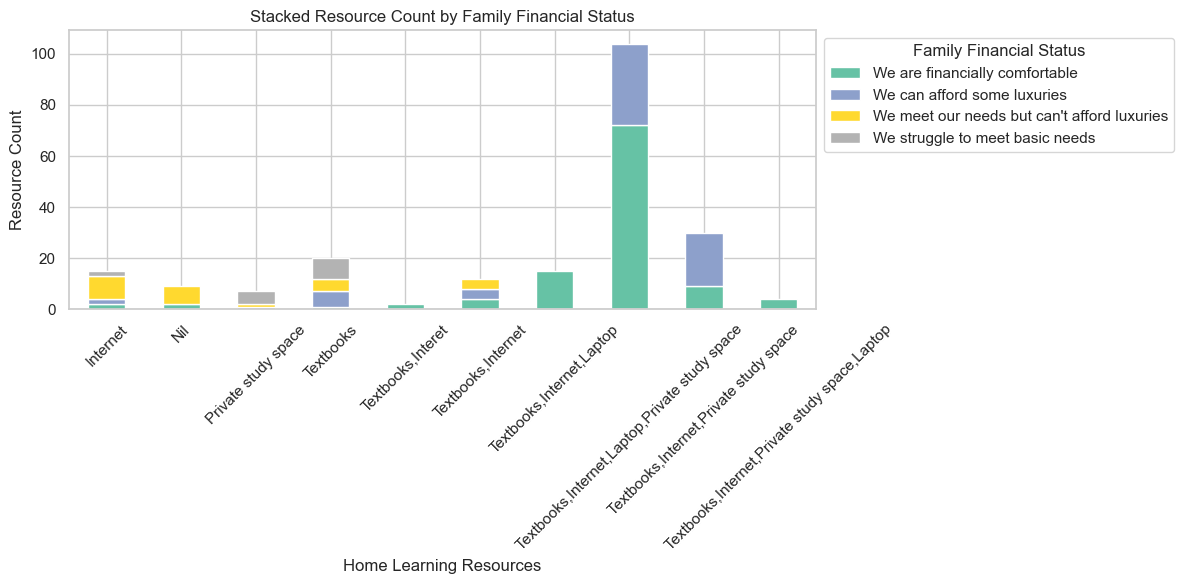

In [96]:
# Pivot the data for stacked bar chart
stacked_data = data_frame.groupby(['Home Learning Resources', 'Family Financial Status'])['Resource Count'].sum().unstack()

# Plotting
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Resource Count by Family Financial Status')
plt.xlabel('Home Learning Resources')
plt.ylabel('Resource Count')
plt.xticks(rotation=45)
plt.legend(title='Family Financial Status', bbox_to_anchor=(1, 1))
plt.tight_layout()

image_path = '../../../docs/resourcesfamily.png'  # Change to your desired path
plt.savefig(image_path)

plt.show()


In [87]:
average_count_df = data_frame.groupby('Family Financial Status')['Resource Count'].mean().reset_index()

# Renaming the columns for clarity
average_count_df.columns = ['Family Financial Status', 'Average Resource Count']

print(average_count_df)

                       Family Financial Status  Average Resource Count
0               We are financially comfortable                3.171429
1                  We can afford some luxuries                2.538462
2  We meet our needs but can't afford luxuries                1.083333
3              We struggle to meet basic needs                1.000000


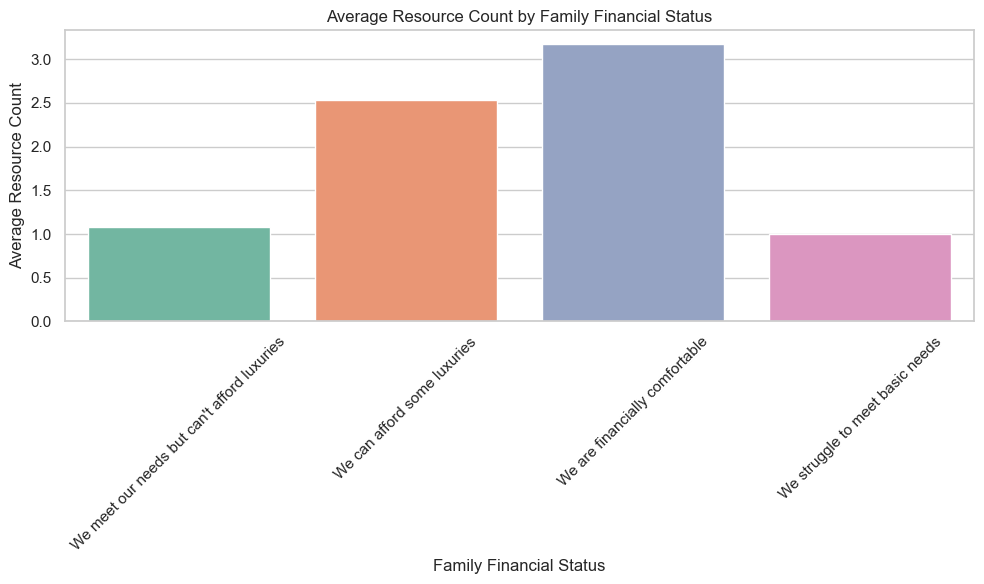

In [98]:
# Create a bar plot to show average Resource Count by Family Financial Status
plt.figure(figsize=(10, 6))
sns.barplot(data=data_frame, x='Family Financial Status', y='Resource Count',hue =  'Family Financial Status',palette='Set2', errorbar=None)

plt.title('Average Resource Count by Family Financial Status')
plt.xlabel('Family Financial Status')
plt.ylabel('Average Resource Count')
plt.xticks(rotation=45)
plt.tight_layout()
image_path = '../../../docs/avgfam.png'  # Change to your desired path
plt.savefig(image_path)

plt.show()


### Insights on Family Financial Status and Resource Access

1. **Financial Comfort and Resource Access**:
   - **"We are financially comfortable"**: Average Resource Count = **3.17**  
     - Indicates access to a variety of educational resources, enhancing learning.

2. **Moderate Resource Access**:
   - **"We can afford some luxuries"**: Average Resource Count = **2.54**  
     - Suggests financial constraints limit access to additional resources.

3. **Limited Resource Access**:
   - **"We meet our needs but can't afford luxuries"**: Average Resource Count = **1.08**  
     - Highlights that financial struggles impede access to essential learning resources.

4. **Critical Resource Limitations**:
   - **"We struggle to meet basic needs"**: Average Resource Count = **1.00**  
     - Indicates significant limitations in critical resources necessary for effective learning.

### Conclusion
There is a clear relationship between **Family Financial Status** and **resource availability**. Financially stable families provide better access to learning resources, while lower financial standings hinder educational achievements. This insight can guide interventions aimed at improving resource accessibility for students from less financially stable backgrounds.